<h4> Load Libraries </h4>

In [3]:
library(e1071)   # for skewness and kurtosis
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: 'ggplot2'


The following object is masked from 'package:e1071':

    element



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




<h4> Load Dataset </h4>

In [5]:
# Load CSV file
creditcard_df <- read.csv("creditcard.csv",header = TRUE, sep = ",", stringsAsFactors = FALSE)
head(creditcard_df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


<h4> Diaplay Summary Statistics </h4>

In [9]:
summary(creditcard_df)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1798  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

<h2> 1.	First EDA (Raw Data) </h2>

<h4> 1.1 Descriptive stats for Amount </h4>

In [ ]:
feature <- creditcard_df$Amount

# Descriptive statistics
stats_df <- data.frame(
  Feature   = "Amount",
  Mean      = mean(feature, na.rm = TRUE),
  Variance  = var(feature, na.rm = TRUE),
  Skewness  = skewness(feature, na.rm = TRUE),
  Kurtosis  = kurtosis(feature, na.rm = TRUE)
)

# Print results
stats_df

<h4> 1.2  Fraud vs Non Fruad Transactions Histogram</h4>

In [ ]:
#creditcard_df$Class <- factor(creditcard_df$Class,
                             #  levels = c(0,1),
                               #labels = c("Non-Fraud", "Fraud"))

In [ ]:

ggplot(creditcard_df, aes(x = log1p(Amount), fill = factor(Class))) +
  geom_histogram(bins = 30, alpha = 0.6, position = "identity") +
  scale_fill_manual(values = c("0" = "steelblue", "1" = "red")) +
  labs(title = "Histogram of log(Transaction Amount + 1): Fraud vs Non-Fraud",
       x = "Log(Transaction Amount + 1)",
       y = "Count") +
  theme_minimal()



In [ ]:
library(ggplot2)

ggplot(creditcard_df, aes(x = Amount, fill = Class)) +
  geom_histogram(bins = 50, alpha = 0.6, position = "identity") +
  labs(title = "Histogram of Transaction Amounts: Fraud vs Non-Fraud",
       x = "Transaction Amount", y = "Count") +
  theme_minimal()


In [ ]:
colnames(creditcard_df)


In [57]:
str(creditcard_df$Class)

 int [1:284807] 0 0 0 0 0 0 0 0 0 0 ...


Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"
Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


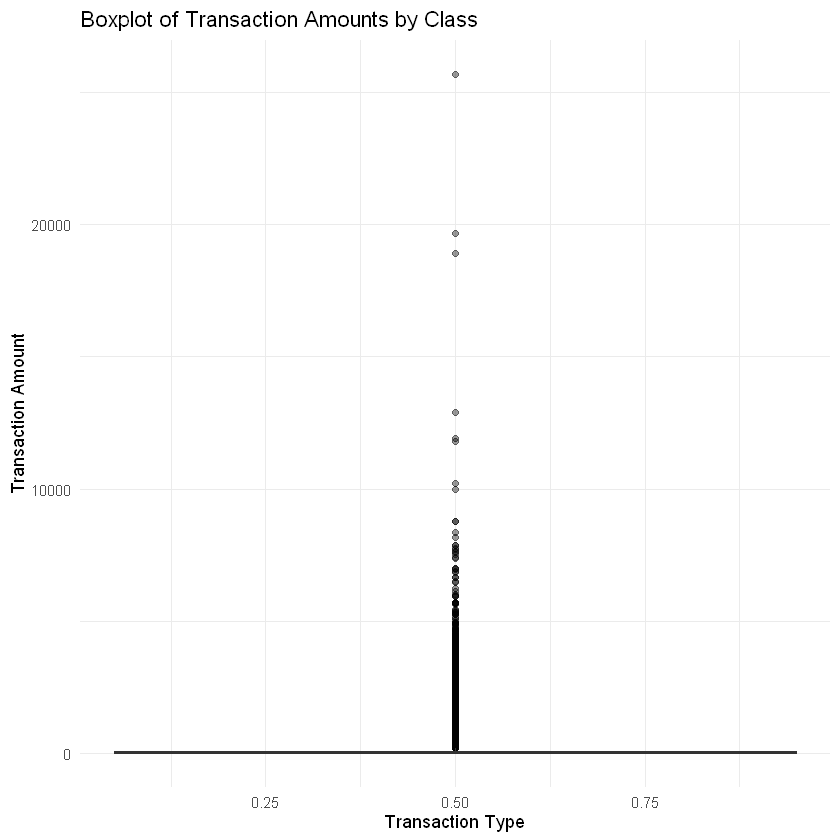

In [7]:
ggplot(creditcard_df, aes(x = Class, y = Amount, fill = Class)) +
  geom_boxplot(outlier.colour = "black", outlier.alpha = 0.4) +
  labs(title = "Boxplot of Transaction Amounts by Class",
       x = "Transaction Type", y = "Transaction Amount") +
  theme_minimal()
